# Machine learning customer segmentation project
In this project, I will build a machine learning model for customer segmentation. It involves unsupervised learning, using an unlabeled training set for clustering. I intend to perform clustering to summarize customer segments of a retail store, identifying an ideal client group and building a loyalty program.

I will use the following pipeline, based on CRISP-DM framework:

1. Define the business problem.
2. Initial data understanding.
3. Exploratory data analysis and feature engineering.
4. Data cleaning and preprocessing.
5. Group customers into clusters, modelling.
6. Interpret the results, analysing the groups created (profiling). 
7. Provide marketing suggestions and the loyalty program.
8. Estimate financial results.

# 1. Business problem

Problem statement:
- A retail store aims to gain a deeper understanding of its customer characteristics and to strategically utilize this knowledge. One of its primary goals is to proficiently segment its clientele, allowing for enhanced comprehension of its customers' preferences. This, in turn, facilitates the adaptation of products to cater to the unique requirements, behaviors, and concerns of various customer segments.
- Additionally, the store wants to build better connections with customers and keep them coming back by starting a loyalty program. They'll look closely at how customers behave, what they buy, and what they like. Then, they'll create a loyalty program with special rewards and benefits just for different groups of customers. This special treatment doesn't just keep customers coming back; it also makes them feel valued and part of the store's family, which makes them like the brand even more.

I will be using the RFM model for clustering analysis. 

The RFM model is a marketing and customer segmentation technique used to analyze and categorize customers based on their recent purchasing behavior. RFM stands for:

- Recency: This measures how recently a customer has made a purchase. Customers who have made a purchase more recently are typically considered more valuable.
- Frequency: This measures how often a customer makes purchases. Customers who make frequent purchases are often more engaged and loyal.
- Monetary Value: This assesses the amount of money a customer has spent on purchases. Customers who have spent more are usually considered higher-value customers.

By analyzing these three factors, businesses can categorize their customers into different segments, such as "high-value and highly engaged" or "low-value and inactive." This segmentation allows companies to tailor their marketing strategies and offers to each group more effectively, ultimately improving customer retention and maximizing revenue.

Considering everything mentioned above, the project objectives are:

1. Identify customer groups and create profiles for them. By doing this, it will be possible to assess common characteristics of client segments, such as product preferences and demographic information.
2. Design a loyalty program based on an ideal customer group with the intention of improving client retention and increasing revenue.
3. Achieve satisfactory financial results through customer segmentation and the loyalty program, which will be estimated in final steps.

By doing this, the business problem will be resolved.

### Importing the libraries

In [61]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Utils.
from scripts.eda_utils import *

# 2. Initial data understanding
The dataset was collected from kaggle: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [62]:
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')

In [63]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Data dictionary
<b>People</b><br>

<b>ID:</b> Customer's unique identifier<br>
<b>Year_Birth:</b> Customer's birth year<br>
<b>Education:</b> Customer's education level<br>
<b>Marital_Status:</b> Customer's marital status<br>
<b>Income:</b> Customer's yearly household income<br>
<b>Kidhome:</b> Number of children in customer's household<br>
<b>Teenhome:</b> Number of teenagers in customer's household<br>
<b>Dt_Customer:</b> Date of customer's enrollment with the company<br>
<b>Recency:</b> Number of days since customer's last purchase<br>
<b>Complain:</b> 1 if the customer complained in the last 2 years, 0 otherwise<br>

<b>Products</b><br>

<b>MntWines:</b> Amount spent on wine in last 2 years<br>
<b>MntFruits:</b> Amount spent on fruits in last 2 years<br>
<b>MntMeatProducts:</b> Amount spent on meat in last 2 years<br>
<b>MntFishProducts:</b> Amount spent on fish in last 2 years<br>
<b>MntSweetProducts:</b> Amount spent on sweets in last 2 years<br>
<b>MntGoldProds:</b> Amount spent on gold in last 2 years<br>

<b>Promotion</b>
    
<b>NumDealsPurchases:</b> Number of purchases made with a discount<br>
<b>AcceptedCmp1:</b> 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
<b>AcceptedCmp2:</b> 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
<b>AcceptedCmp3:</b> 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
<b>AcceptedCmp4:</b> 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
<b>AcceptedCmp5:</b> 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
<b>Response:</b> 1 if customer accepted the offer in the last campaign, 0 otherwise<br>

<b>Place</b>
    
<b>NumWebPurchases:</b> Number of purchases made through the company’s website<br>
<b>NumCatalogPurchases:</b> Number of purchases made using a catalogue<br>
<b>NumStorePurchases:</b> Number of purchases made directly in stores<br>
<b>NumWebVisitsMonth:</b> Number of visits to company’s website in the last month<br>

Looking at dataset general information.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [65]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 2240 rows and 29 columns.


There are some missing values in income. Furthermore, some features seem to be in the incorrect data type.

Looking at some descriptive statistics

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Insights:
1. At a glance, as expected, Income has some outliers. Moreover, the average income is $52247.251354.
2. When analysing kidhome and teenhome median values, seems like the majority of the customers don't have children.
3. Customers' recency is, on average, 49 days. This is a high value, which motivates even more our loyalty program. The retail store must plan strategies to decrease its recency and estimulate clients to buy more.
4. Customers spent, on average, more money on wine products. This is expected since they must be more expensive than the others.
5. On average, store and web are the customers' favorite ways to buy the store products.
6. The number of web visits per month and the accepted campaigns rates are low. This also reinforces the worthiness of our clustering analysis and loyalty program.
7. Min year_birth is 1893.0. This outlier represents inconsistent information, which I will treat further. For the other features, seems like there are no wrong values.

Looking at missing and duplicated values.

In [67]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [68]:
df['ID'].duplicated().sum()

0

In [69]:
df.duplicated().sum()

0

There are some missing values in income. Moreover, there are no duplicated values.

I will rename columns in order to turn data manipulation easier. Also, I will remove z columns because I don't have information about what they represent. Id column will also be removed because it is useless for modelling and eda.

In [70]:
df.drop(columns=['Z_CostContact', 'Z_Revenue', 'ID'], inplace=True)

In [71]:
df.columns = [x.lower() for x in df.columns]

In [72]:
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


I will convert dt_customer to the correct data type, datetime. This will be useful for creating new features further.

In [73]:
df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%d-%m-%Y')

In [74]:
print(f'The first customer enrolled with the company at {df.dt_customer.min()}.')
print(f'The last customer enrolled with the company at {df.dt_customer.max()}.')

The first customer enrolled with the company at 2012-07-30 00:00:00.
The last customer enrolled with the company at 2014-06-29 00:00:00.


# Exploratory data analysis and feature engineering
I will explore the dataset in order to get a better undestanding of how the features are individually distributed, the relashionships between them, correlations, trends and possible insights. Moreover, based on the exploration, I will do some feature engineering, in order to extract the maximum amount of information from the available attributes.

I will obtain categorical features and numerical features separate lists in order to turn data visualization and exploration easier.

In [75]:
numerical_features = df.select_dtypes('number').columns.tolist()
categorical_features = df.select_dtypes('object').columns.tolist()

print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)}. They are: ')
print(categorical_features)

There are 23 numerical features. They are: 
['year_birth', 'income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'response']

There are 2. They are: 
['education', 'marital_status']


I will look at categorical features unique values. Cardinality is an important factor when choosing an encoding technique for them.

In [76]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {df[feature].nunique()} unique values. They are: ')
    print(df[feature].value_counts(normalize=True))
    print()

education
----------------------------------------
There are 5 unique values. They are: 
education
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: proportion, dtype: float64

marital_status
----------------------------------------
There are 8 unique values. They are: 
marital_status
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: proportion, dtype: float64



For education, there is an ordinal relationship. Thus, ordinal encoding might be a possibility for encoding it. Moreover, seems like in both attributes there are domains that can be merged together in one, like YOLO, Absurd, Alone in Single. The same for education. This will reduce the cardinality while preserving the original information.

# Univariate analysis
I will do univariate analysis below in order to see which are the typical values of each feature for the store's customers.

# Numerical features distributions
I will look at numerical features distributions below in order to see if there are skewed distributions and which are the most common values for the store's customers numeric attributes.

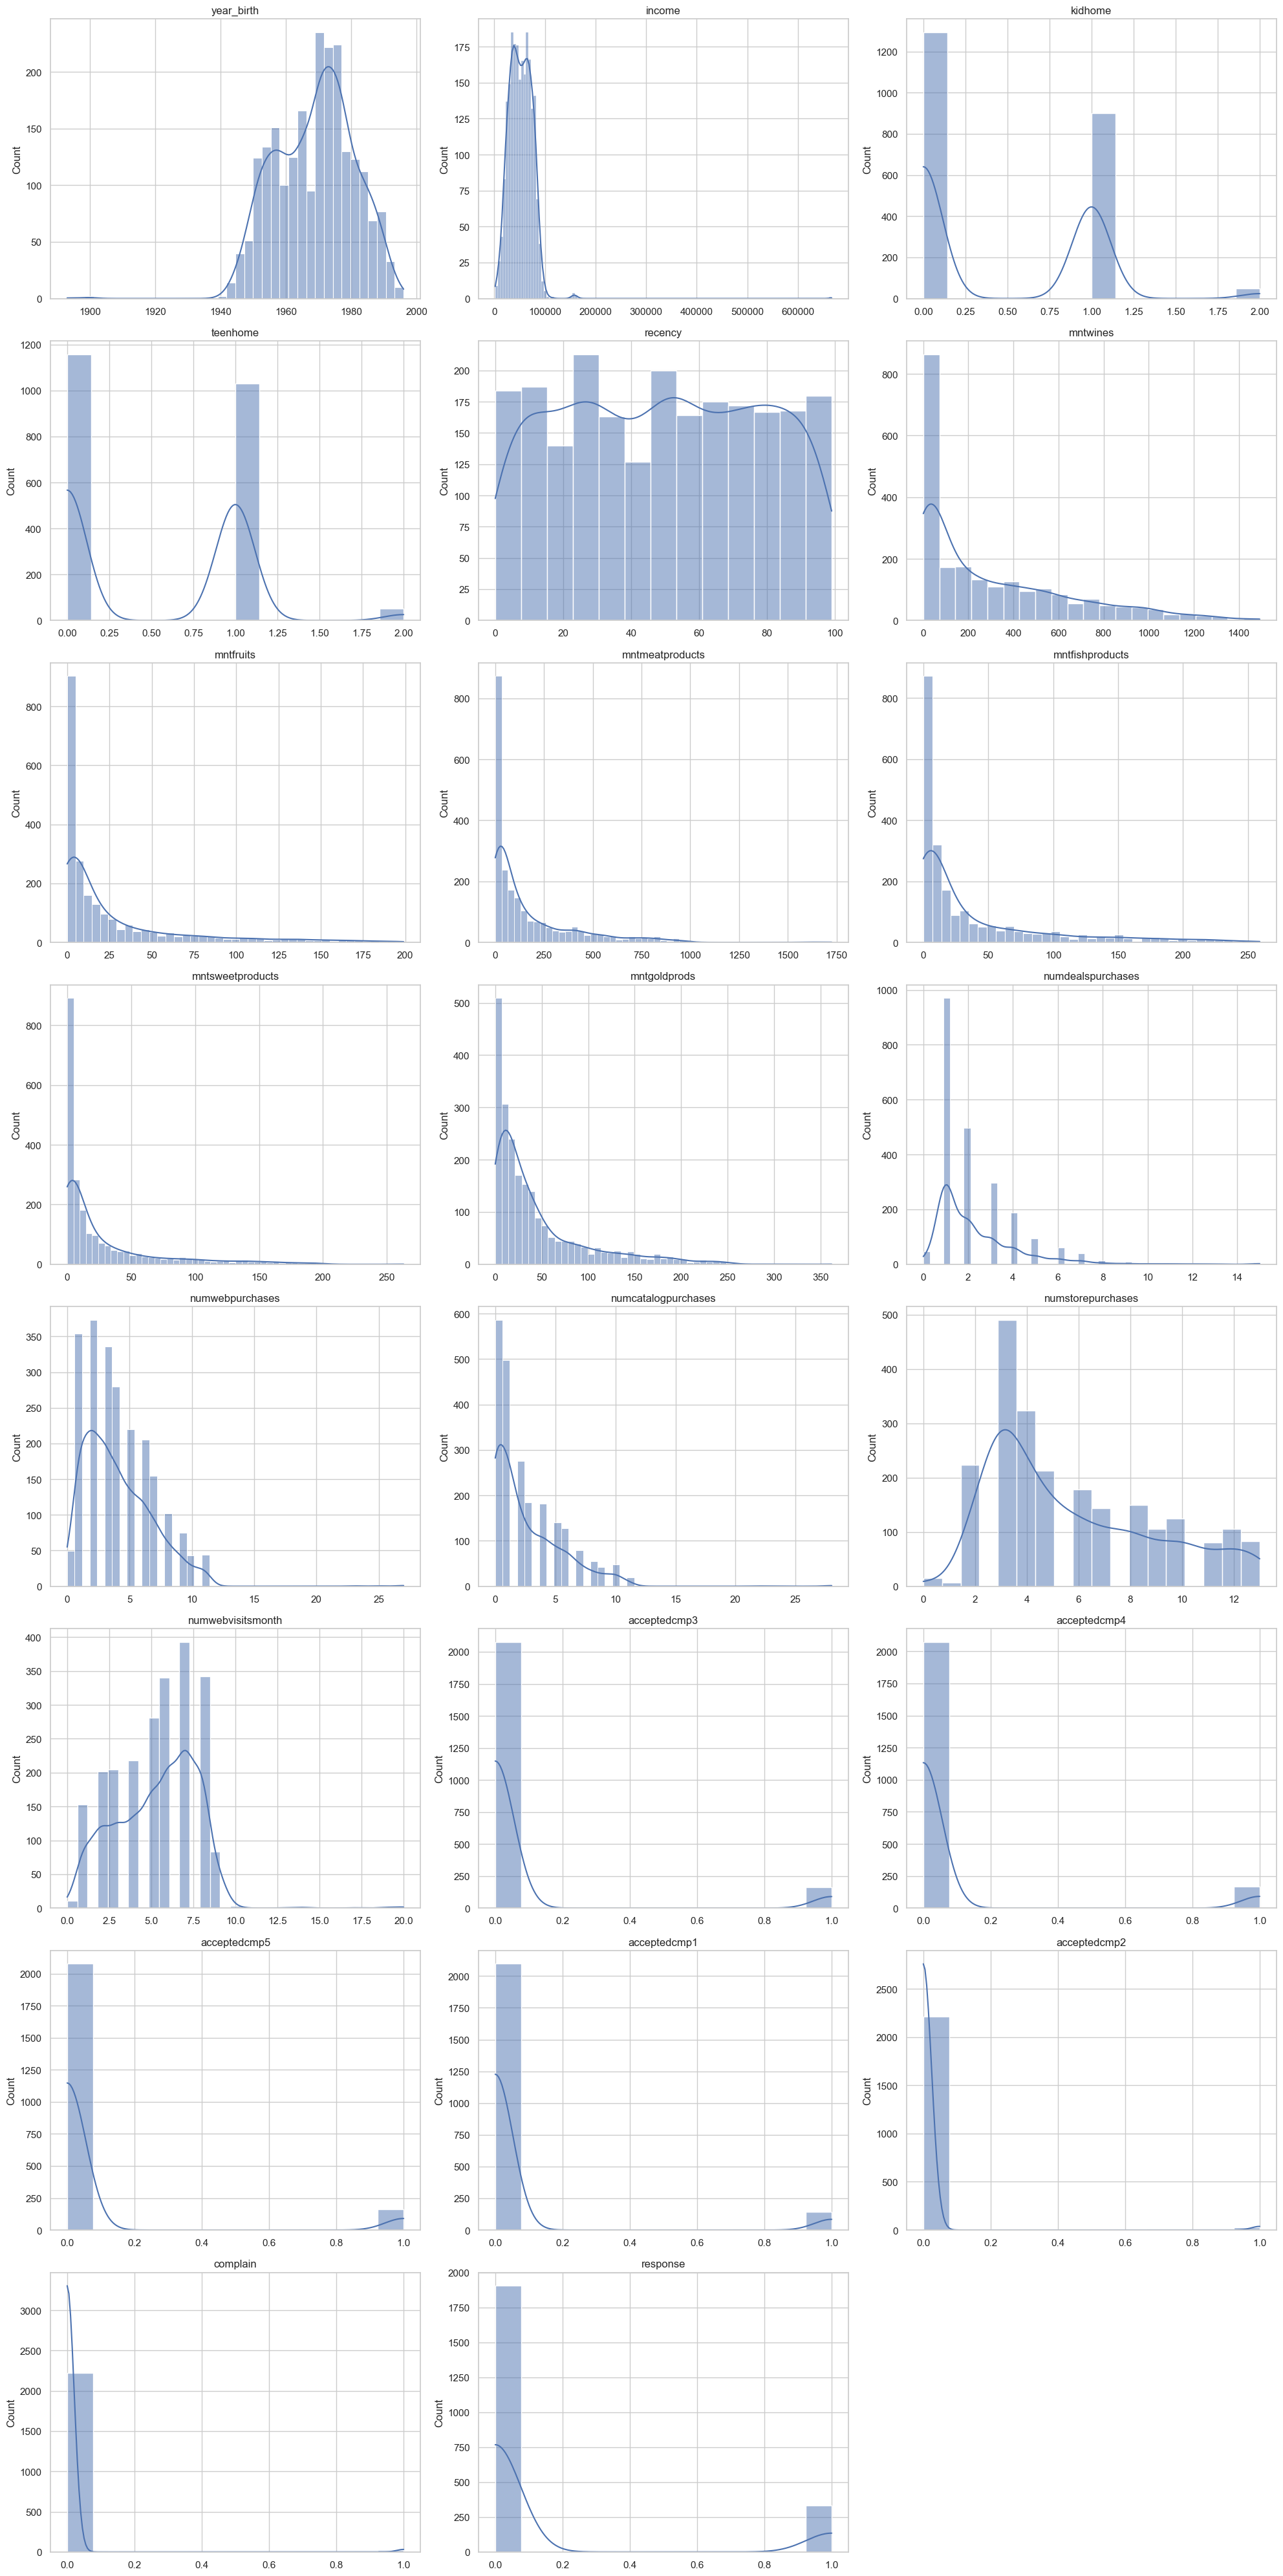

In [77]:
sns_plots(data=df, features=numerical_features, histplot=True, kde=True)